# S010_right_heart
RでのPSM実装例  

有名な右心カテ研究のデータを利用する  
データの取り込みから、簡単なPSmatching，検定までを実施  
それぞれの理論背景は前回講義を参照のこと  

コードはTidyverseの書き方に寄せている  

## env creation:  
mamba create -n rn python=3.11 jupyter pandas r-irkernel r-base r-tidyverse r-DT r-tableone r-ggpubr r-Matching r-MatchIt r-pROC r-data.table r-openxlsx -c r

## env call:  
mamba activate rn

load packages

In [1]:
require(tidyverse)

require(DT)
require(pROC)
require(data.table)
require(tableone)
require(openxlsx)
require(ggpubr)

require(Matching)
require(MatchIt)

Loading required package: tidyverse

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: DT

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are maske

## details about packages

In [2]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/dryad/miniforge3/envs/rn/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Asia/Tokyo
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] MatchIt_4.5.5     Matching_4.10-15  MASS_7.3-60       ggpubr_0.6.0     
 [5] openxlsx_4.2.7.1  tableone_0.13.2   data.table_1.16.2 pROC_1.18.5      
 [9] DT_0.33           lubridate_1.9.3   forcats_1.0.0     stringr_1.5.0    
[13] dplyr_1.1.3       purrr_1.0.2       readr_2.1.4       

## RHC data
from  
https://hbiostat.org/data/  

info  
https://hbiostat.org/data/repo/rhc.html  

original study 
https://pubmed.ncbi.nlm.nih.gov/8782638/

Previsou example:  
http://rstudio-pubs-static.s3.amazonaws.com/8257_c577ba847be34e89b85a326f20b6d6b9.html  
ただしコードがめっちゃ古い  


nonrandomパッケージは開発終了しており、現在は利用不能

download

In [3]:
datdir <- "./dat"
if(!dir.exists(datdir)){
  dir.create(datdir)
}


fileurls <- "https://hbiostat.org/data/repo/rhc.csv"

destfile <- str_c(datdir, "/rhc.csv", sep="")


if(!file.exists(destfile)){
  download.file(url = fileurls,
              destfile = destfile)
}

load

In [4]:
rhc <- readr::read_csv(destfile) %>%  
  mutate(numco = cardiohx + chfhx + dementhx + 
           psychhx + chrpulhx + renalhx + 
           liverhx + gibledhx + malighx +
           immunhx + transhx + amihx)

New names:
• `` -> `...1`
Rows: 5735 Columns: 63
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (22): cat1, cat2, ca, death, sex, dth30, swang1, dnr1, ninsclas, resp, c...
dbl (41): ...1, sadmdte, dschdte, dthdte, lstctdte, cardiohx, chfhx, dementh...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hint:  
What is the rhc??  
use Cntr+I


In [5]:
rhc %>%
  colnames()

[1] "...1"     "cat1"     "cat2"     "ca"       "sadmdte"  "dschdte" 
 [7] "dthdte"   "lstctdte" "death"    "cardiohx" "chfhx"    "dementhx"
[13] "psychhx"  "chrpulhx" "renalhx"  "liverhx"  "gibledhx" "malighx" 
[19] "immunhx"  "transhx"  "amihx"    "age"      "sex"      "edu"     
[25] "surv2md1" "das2d3pc" "t3d30"    "dth30"    "aps1"     "scoma1"  
[31] "meanbp1"  "wblc1"    "hrt1"     "resp1"    "temp1"    "pafi1"   
[37] "alb1"     "hema1"    "bili1"    "crea1"    "sod1"     "pot1"    
[43] "paco21"   "ph1"      "swang1"   "wtkilo1"  "dnr1"     "ninsclas"
[49] "resp"     "card"     "neuro"    "gastr"    "renal"    "meta"    
[55] "hema"     "seps"     "trauma"   "ortho"    "adld3p"   "urin1"   
[61] "race"     "income"   "ptid"     "numco"

In [6]:
rhc %>%
  DT::datatable()

Warning message in instance$preRenderHook(instance):
“It seems your data is too big for client-side DataTables. You may consider server-side processing: https://rstudio.github.io/DT/server.html”


HTML widgets cannot be represented in plain text (need html)

create table1


In [7]:

listvar <- c("age", 
             "sex",
             "edu",
             "race",
             "income",
             "ninsclas",
             "wtkilo1",
             "cat1",
             "numco",
             "dnr1",
             "surv2md1",
             "das2d3pc",
             "aps1",
             "scoma1",
             "meanbp1","wblc1","hrt1","resp1","temp1","pafi1","alb1","hema1","bili1","crea1","sod1","pot1","paco21","ph1",
             "ca"
             )

listfac <- c("sex",
             "race",
             "income",
             "ninsclas",
             "cat1"
             )
v_strat <- "swang1"
cramVars <- c("sex")
nonnormal <- c("age", "wblc1")
exact <- c("sex",
             "race",
             "income",
             "ninsclas",
             "cat1",
           "ca")
argsExact <-  list(workspace = 2 * 10^5)

table1 <- CreateTableOne(vars = listvar,
                         strata = v_strat,
                         factorVars = listfac,
                         data = rhc,
                         argsExact =  argsExact)
table1

                        Stratified by swang1
                         No RHC          RHC             p      test
  n                        3551            2184                     
  age (mean (SD))         61.76 (17.29)   60.75 (15.63)   0.026     
  sex = Male (%)           1914 (53.9)     1278 (58.5)    0.001     
  edu (mean (SD))         11.57 (3.13)    11.86 (3.16)    0.001     
  race (%)                                                0.425     
     black                  585 (16.5)      335 (15.3)              
     other                  213 ( 6.0)      142 ( 6.5)              
     white                 2753 (77.5)     1707 (78.2)              
  income (%)                                             <0.001     
     > $50k                 257 ( 7.2)      194 ( 8.9)              
     $11-$25k               713 (20.1)      452 (20.7)              
     $25-$50k               500 (14.1)      393 (18.0)              
     Under $11k            2081 (58.6)     1145 (52.4)    

save table1

In [8]:
t1 <- table1 %>%
  print(quote=T,cramVars = cramVars, nonnormal=nonnormal, noSpace=T, quate=T, addOverall = T, exact=exact,minMax = TRUE,factorVars = listfac,showAllLevels=T)

                          "Stratified by swang1"
 ""                        "level"               "No RHC"               
  "n"                      ""                    "3551"                 
  "age (median [range])"   ""                    "64.59 [18.04, 101.85]"
  "sex (%)"                "Female"              "1637 (46.1)"          
  ""                       "Male"                "1914 (53.9)"          
  "edu (mean (SD))"        ""                    "11.57 (3.13)"         
  "race (%)"               "black"               "585 (16.5)"           
  ""                       "other"               "213 (6.0)"            
  ""                       "white"               "2753 (77.5)"          
  "income (%)"             "> $50k"              "257 (7.2)"            
  ""                       "$11-$25k"            "713 (20.1)"           
  ""                       "$25-$50k"            "500 (14.1)"           
  ""                       "Under $11k"          "2081 (58.6)"          
  

In [9]:
rn <- t1 %>%
  rownames() %>%
  str_remove_all("\"")

tab3Mat <- t1 %>%
  as.data.frame() %>%
  mutate(rowname = rn) %>%
  dplyr::select(rowname, everything()) %>%
  as.data.table()

tab3Mat %>%
  DT::datatable()

HTML widgets cannot be represented in plain text (need html)

In [10]:
write.xlsx(x = tab3Mat,
          "./dat/table1.xlsx",
          overwrite = T)

cross tabulation

In [11]:
rhc_smr <- rhc %>%
  group_by(death, swang1) %>%
  summarise(n=n()) %>%
  tidyr::spread(key=death, value=n) %>%
  mutate(death_rate = Yes /(Yes + No))
rhc_smr %>%
  DT::datatable()

`summarise()` has grouped output by 'death'. You can override using the `.groups` argument.


HTML widgets cannot be represented in plain text (need html)

function to get coef and interval

In [12]:
GetConfInt <- function(obj) {

    logitsticModel <- FALSE

    if (identical(class(obj), c("glm", "lm")) == TRUE) {

        mat <- coef(summary(obj))
        logitsticModel <- TRUE

    } else if (identical(class(obj), c("geeglm", "gee", "glm")) == TRUE) {

        mat <- coef(summary(obj))

    } else if (identical(class(obj), c("coeftest")) == TRUE) {

        mat <- obj

    } else if (identical(class(obj), c("matrix")) == TRUE) {

        mat <- obj

    } else {

        stop("Not a supported object")
    }

    ## Add point estimates
    matRes <- mat[, 1, drop = F]

    ## 1.96 * SE
    matSe <-  mat[, 2, drop = F] * qnorm(0.975)

    ## Estimate, lower 95% limit, upper 95% limit
    matRes <- cbind(matRes, (matRes - matSe), (matRes + matSe))

    ## Name
    colnames(matRes) <- c("OR","lower","upper")

    ## Exponentiate
    matRes <- exp(matRes)

    ## Add p-value
    matRes <- cbind(matRes, mat[, 3:4, drop = F])

    if (logitsticModel == TRUE) {

        matRes[, c("lower","upper")] <- exp(suppressMessages(confint(obj)))
    }

    ## Show
    return(matRes)
}

binalize several vaiables

In [13]:
rhc <- rhc %>%
  mutate(death_b = case_when(
    death == "Yes" ~ 1,
    death == "No" ~ 0,
    T ~ NA_real_
  ))  %>%
  mutate(swang1_b = case_when(
    swang1 == "RHC" ~1,
    swang1 == "No RHC" ~ 0,
    T ~ NA_real_
  )) %>%
  dplyr::select(death_b, swang1_b, everything())

glmCrude <- glm(formula = death_b ~ swang1_b,
                family  = binomial(link = "logit"),
                data    = rhc)

glmCrude %>%
  summary()

GetConfInt(glmCrude)



Call:
glm(formula = death_b ~ swang1_b, family = binomial(link = "logit"), 
    data = rhc)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.53085    0.03475  15.276  < 2e-16 ***
swang1_b     0.22477    0.05756   3.905 9.43e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7433.3  on 5734  degrees of freedom
Residual deviance: 7417.9  on 5733  degrees of freedom
AIC: 7421.9

Number of Fisher Scoring iterations: 4


OR       lower    upper    z value   Pr(>|z|)    
(Intercept) 1.700380 1.588728 1.820610 15.275549 1.112871e-52
swang1_b    1.252038 1.118713 1.401914  3.904925 9.425480e-05

what is e-05??

In [14]:
3e+2
2e-1
5e-2

[1] 300

[1] 0.2

[1] 0.05

多変量全部のせ

In [15]:
glmFull <- glm(formula =  death_b ~ swang1 + age + sex + race + edu + income + ninsclas + cat1 + das2d3pc + dnr1 + ca + surv2md1 + aps1 + scoma1 + wtkilo1 + temp1 + meanbp1 + resp1 + hrt1 + pafi1 + paco21 + ph1 + wblc1 + hema1 + sod1 + pot1 + crea1 + bili1 + alb1 + resp + card + neuro + gastr + renal + meta + hema + seps + trauma + ortho + cardiohx + chfhx + dementhx + psychhx + chrpulhx + renalhx + liverhx + gibledhx + malighx + immunhx + transhx + amihx,
               family  = binomial(link = "logit"),
               data    = rhc)

summary(glmFull)
## Show result
GetConfInt(glmFull)


Call:
glm(formula = death_b ~ swang1 + age + sex + race + edu + income + 
    ninsclas + cat1 + das2d3pc + dnr1 + ca + surv2md1 + aps1 + 
    scoma1 + wtkilo1 + temp1 + meanbp1 + resp1 + hrt1 + pafi1 + 
    paco21 + ph1 + wblc1 + hema1 + sod1 + pot1 + crea1 + bili1 + 
    alb1 + resp + card + neuro + gastr + renal + meta + hema + 
    seps + trauma + ortho + cardiohx + chfhx + dementhx + psychhx + 
    chrpulhx + renalhx + liverhx + gibledhx + malighx + immunhx + 
    transhx + amihx, family = binomial(link = "logit"), data = rhc)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  5.1231961  3.2338010   1.584  0.11313    
swang1RHC                    0.3240615  0.0751112   4.314 1.60e-05 ***
age                          0.0139231  0.0029637   4.698 2.63e-06 ***
sexMale                      0.2862156  0.0674518   4.243 2.20e-05 ***
raceother                    0.0569618  0.1528549   0.373  0.70941    
racewhite            

OR           lower      upper        z value    
(Intercept)                 167.87103893 0.30125406 9.681805e+04  1.5842645 
swang1RHC                     1.38273237 1.19372356 1.602483e+00  4.3144234 
age                           1.01402047 1.00815121 1.019934e+00  4.6978117 
sexMale                       1.33137947 1.16665682 1.519810e+00  4.2432641 
raceother                     1.05861535 0.78515086 1.429873e+00  0.3726527 
racewhite                     0.98723022 0.82155137 1.185250e+00 -0.1374894 
edu                           1.00955533 0.98685366 1.032773e+00  0.8198733 
income$11-$25k                1.19980623 0.91658036 1.569457e+00  1.3281118 
income$25-$50k                1.02189508 0.78039372 1.337244e+00  0.1576963 
incomeUnder $11k              1.42424694 1.08975817 1.859828e+00  2.5943828 
ninsclasMedicare              1.42434277 1.11039463 1.826898e+00  2.7853864 
ninsclasMedicare & Medicaid   1.31465869 0.95982547 1.805355e+00  1.6982822 
ninsclasNo insurance          1.48119618 1.08411820 2.025843e+00  2.4640969 
ninsclasPrivate               1.22142166 0.96864133 1.540339e+00  1.6906452 
ninsclasPrivate & Medicare    1.09230626 0.84200231 1.416651e+00  0.6653758 
cat1CHF                       1.26239915 0.91747047 1.737409e+00  1.4309476 
cat1Cirrhosis                 1.13208433 0.71147598 1.805127e+00  0.5229225 
cat1Colon Cancer              0.28777125 0.03861830 2.261423e+00 -1.2170150 
cat1Coma                      1.80364323 1.26741093 2.578732e+00  3.2566778 
cat1COPD                      1.29153895 0.94229785 1.772101e+00  1.5883556 
cat1Lung Cancer               4.01274532 1.26306618 1.793028e+01  2.1201325 
cat1MOSF w/Malignancy         1.73907692 1.13651722 2.711524e+00  2.5000589 
cat1MOSF w/Sepsis             0.91042144 0.75809921 1.093464e+00 -1.0045377 
das2d3pc                      0.95888695 0.94686557 9.710247e-01 -6.5330541 
dnr1Yes                       2.31916353 1.79200407 3.034084e+00  6.2692861 
caNo                          0.18449031 0.04747146 5.796867e-01 -2.6990551 
caYes                         0.42786240 0.27129382 6.567314e-01 -3.7750860 
surv2md1                      0.04018959 0.01873385 8.537130e-02 -8.3091165 
aps1                          1.00537517 0.99943250 1.011367e+00  1.7705809 
scoma1                        1.00043567 0.99722414 1.003670e+00  0.2650967 
⋮                           ⋮            ⋮          ⋮            ⋮          
ph1                         0.8561589    0.3921319  1.862414     -0.39084435
wblc1                       1.0063150    1.0001673  1.012748      1.97373152
hema1                       0.9912975    0.9824357  1.000232     -1.90895825
sod1                        1.0011087    0.9925542  1.009758      0.25282811
pot1                        1.0072315    0.9419157  1.077435      0.21019254
crea1                       1.0222087    0.9778964  1.069170      0.96595722
bili1                       1.0310448    1.0118922  1.051998      3.08768338
alb1                        1.0013897    0.9181354  1.097933      0.03092296
respYes                     1.2456802    1.0546479  1.472460      2.58086974
cardYes                     1.1592680    0.9771368  1.376364      1.69145842
neuroYes                    1.3890951    1.0855018  1.780365      2.60472619
gastrYes                    1.3430130    1.0764810  1.678608      2.60294078
renalYes                    0.8496038    0.6224476  1.166458     -1.01815122
metaYes                     1.1100171    0.8166814  1.517808      0.66075514
hemaYes                     2.2118132    1.5850889  3.122979      4.59481093
sepsYes                     1.2286893    1.0117184  1.494312      2.07046026
traumaYes                   0.8724797    0.4551830  1.628529     -0.42164612
orthoYes                    1.2712102    0.2372473  9.573488      0.26788869
cardiohx                    1.2267925    1.0144679  1.485895      2.10006374
chfhx                       1.6253575    1.3189054  2.009523      4.52354403
dementhx                

PSモデル

In [16]:

psModel <- glm(formula = swang1_b ~ age + sex + race + edu + income + ninsclas + cat1 + das2d3pc + dnr1 + ca + surv2md1 + aps1 + scoma1 + wtkilo1 + temp1 + meanbp1 + resp1 + hrt1 + pafi1 + paco21 + ph1 + wblc1 + hema1 + sod1 + pot1 + crea1 + bili1 + alb1 + resp + card + neuro + gastr + renal + meta + hema + seps + trauma + ortho + cardiohx + chfhx + dementhx + psychhx + chrpulhx + renalhx + liverhx + gibledhx + malighx + immunhx + transhx + amihx,
               family  = binomial(link = "logit"),
               data    = rhc)
psModel %>%
  GetConfInt()

psModel %>%
  summary()

OR           lower        upper        z value    
(Intercept)                 3.106589e+07 6.997439e+04 1.418114e+10  5.53583452
age                         9.956359e-01 9.900646e-01 1.001237e+00 -1.52822570
sexMale                     1.048999e+00 9.182826e-01 1.198365e+00  0.70448973
raceother                   1.024136e+00 7.598053e-01 1.378633e+00  0.15698300
racewhite                   9.530707e-01 7.930954e-01 1.146163e+00 -0.51180624
edu                         1.026540e+00 1.003315e+00 1.050378e+00  2.24046770
income$11-$25k              9.692349e-01 7.393417e-01 1.271540e+00 -0.22597636
income$25-$50k              1.059279e+00 8.083607e-01 1.389038e+00  0.41712041
incomeUnder $11k            1.023903e+00 7.828268e-01 1.340800e+00  0.17212998
ninsclasMedicare            1.262254e+00 9.690976e-01 1.646614e+00  1.72267369
ninsclasMedicare & Medicaid 1.493684e+00 1.071650e+00 2.080266e+00  2.37230539
ninsclasNo insurance        1.692947e+00 1.219284e+00 2.350642e+00  3.14523673
ninsclasPrivate             1.512671e+00 1.185589e+00 1.933909e+00  3.31670548
ninsclasPrivate & Medicare  1.417748e+00 1.079967e+00 1.863992e+00  2.50773427
cat1CHF                     2.188835e+00 1.601242e+00 2.994262e+00  4.90741061
cat1Cirrhosis               3.132363e-01 1.954564e-01 4.970198e-01 -4.88066816
cat1Colon Cancer            9.171846e-01 4.665089e-02 5.985009e+00 -0.07722905
cat1Coma                    5.582591e-01 3.898083e-01 7.956296e-01 -3.20440431
cat1COPD                    6.238109e-01 4.274889e-01 9.016040e-01 -2.48145318
cat1Lung Cancer             6.610768e-01 2.039734e-01 1.783763e+00 -0.76004816
cat1MOSF w/Malignancy       1.014413e+00 7.389210e-01 1.391577e+00  0.08865452
cat1MOSF w/Sepsis           1.705733e+00 1.427280e+00 2.039603e+00  5.86473248
das2d3pc                    9.979414e-01 9.850174e-01 1.011010e+00 -0.31019090
dnr1Yes                     5.077575e-01 4.031141e-01 6.369431e-01 -5.81030869
caNo                        2.853644e+00 1.234089e+00 6.839932e+00  2.41021644
caYes                       1.323861e+00 9.654189e-01 1.821967e+00  1.73245908
surv2md1                    1.517479e-01 7.579327e-02 3.031379e-01 -5.33326206
aps1                        1.003776e+00 9.979945e-01 1.009588e+00  1.27935795
scoma1                      9.958466e-01 9.927150e-01 9.989719e-01 -2.59729646
wtkilo1                     1.006353e+00 1.003963e+00 1.008765e+00  5.20308114
⋮                           ⋮            ⋮            ⋮            ⋮          
ph1                         0.1871843    0.0879318     0.3975170   -4.35527187
wblc1                       1.0001465    0.9947084     1.0055284    0.05315372
hema1                       0.9885438    0.9794062     0.9977377   -2.43622931
sod1                        0.9891783    0.9808612     0.9975540   -2.52803165
pot1                        0.8419722    0.7871909     0.9001221   -5.03063382
crea1                       1.0537444    1.0095481     1.0997573    2.39944808
bili1                       1.0072555    0.9926645     1.0220635    0.97257149
alb1                        0.9080722    0.8236303     0.9935367   -2.00424729
respYes                     0.7614659    0.6473951     0.8954228   -3.29412894
cardYes                     1.7464729    1.4767027     2.0661802    6.50867441
neuroYes                    0.6142422    0.4708110     0.7975192   -3.62687540
gastrYes                    1.4197868    1.1548497     1.7458499    3.32549080
renalYes                    1.3504485    1.0084961     1.8097030    2.01543672
metaYes                     0.8932328    0.6568670     1.2090014   -0.72611068
hemaYes                     0.5985775    0.4474849     0.7967152   -3.48954260
sepsYes                     1.3290783    1.1098626     1.5915551    3.09425795
traumaYes                   3.5116441    1.8437598     6.8900470    3.75342925
orthoYes                    3.2592583    0.5103712    23.7945148    1.21908110
cardiohx                    1.0494786    0.8703152     1.2649066    0.50643101


Call:
glm(formula = swang1_b ~ age + sex + race + edu + income + ninsclas + 
    cat1 + das2d3pc + dnr1 + ca + surv2md1 + aps1 + scoma1 + 
    wtkilo1 + temp1 + meanbp1 + resp1 + hrt1 + pafi1 + paco21 + 
    ph1 + wblc1 + hema1 + sod1 + pot1 + crea1 + bili1 + alb1 + 
    resp + card + neuro + gastr + renal + meta + hema + seps + 
    trauma + ortho + cardiohx + chfhx + dementhx + psychhx + 
    chrpulhx + renalhx + liverhx + gibledhx + malighx + immunhx + 
    transhx + amihx, family = binomial(link = "logit"), data = rhc)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 17.2516211  3.1163542   5.536 3.10e-08 ***
age                         -0.0043737  0.0028619  -1.528 0.126457    
sexMale                      0.0478361  0.0679017   0.704 0.481128    
raceother                    0.0238498  0.1519260   0.157 0.875258    
racewhite                   -0.0480662  0.0939149  -0.512 0.608787    
edu                          

1           2           3           4           5           6 
0.351015293 0.669146027 0.633544091 0.368935580 0.445680532 0.055256861 
          7           8           9          10          11          12 
0.433293841 0.180646779 0.193822477 0.284252112 0.595955523 0.753400017 
         13          14          15          16          17          18 
0.897634211 0.367436815 0.354370693 0.236576975 0.223939209 0.651323592 
         19          20          21          22          23          24 
0.490822135 0.837352894 0.427368353 0.452512206 0.535229876 0.353705391 
         25          26          27          28          29          30 
0.390281926 0.714111023 0.090390390 0.317323174 0.567981514 0.635635545 
         31          32          33          34          35          36 
0.583593312 0.204788268 0.442452489 0.249235810 0.263070267 0.556419879 
         37          38          39          40          41          42 
0.649363557 0.275699057 0.174986499 0.378690872 0.555060515 0.735808861 
         43          44          45          46          47          48 
0.217480072 0.356523326 0.495401280 0.184732890 0.406279575 0.095268002 
         49          50          51          52          53          54 
0.433607860 0.065912730 0.679436530 0.460068432 0.066594639 0.375730012 
         55          56          57          58          59          60 
0.557632056 0.687022584 0.583511380 0.639398957 0.129929204 0.338368444 
         61          62          63          64          65          66 
0.099782699 0.654388534 0.129698177 0.342924306 0.388380008 0.181339978 
         67          68          69          70          71          72 
0.344864606 0.199470726 0.034272052 0.346429866 0.788943808 0.607272832 
         73          74          75          76          77          78 
0.846476665 0.006820224 0.086946832 0.235690540 0.304462066 0.225469200 
         79          80          81          82          83          84 
0.213741051 0.844908533 0.197532532 0.078639457 0.477122237 0.795682829 
         85          86          87          88          89          90 
0.447051705 0.351852823 0.008467481 0.147578161 0.441099090 0.363193119 
         91          92          93          94          95          96 
0.082332656 0.070749666 0.237790789 0.279870828 0.337110131 0.207825163 
         97          98          99         100         101         102 
0.218769315 0.278275837 0.152420945 0.791429743 0.720437794 0.580544948 
        103         104         105         106         107         108 
0.552071124 0.148701241 0.207073016 0.139842092 0.266408562 0.065531494 
        109         110         111         112         113         114 
0.570907984 0.259281500 0.014151833 0.070836859 0.093487678 0.422836713 
        115         116         117         118         119         120 
0.401282752 0.168059628 0.184021114 0.848921705 0.742075583 0.556290303 
        121         122         123         124         125         126 
0.368533103 0.037483997 0.356628581 0.644902039 0.071849477 0.356863586 
        127         128         129         130         131         132 
0.502115809 0.373038696 0.124410175 0.370956092 0.051874411 0.230713872 
        133         134         135         136         137         138 
0.621420265 0.643999605 0.132569264 0.811049933 0.429743677 0.404893276 
        139         140         141         142         143         144 
0.031534969 0.223657258 0.214378670 0.271148238 0.344643073 0.317137021 
        145         146         147         148         149         150 
0.584915769 0.521344150 0.178063545 0.626752382 0.587919257 0.308639621 
        151         152         153         154         155         156 
0.386431741 0.556485826 0.834088973 0.009942767 0.568198437 0.256231422 
        157         158         159         160         161         162 
0.131786499 0.166998753 0.065046231 0.786155762 0.113616374 0.267773174 
        163         164         165         166         167         

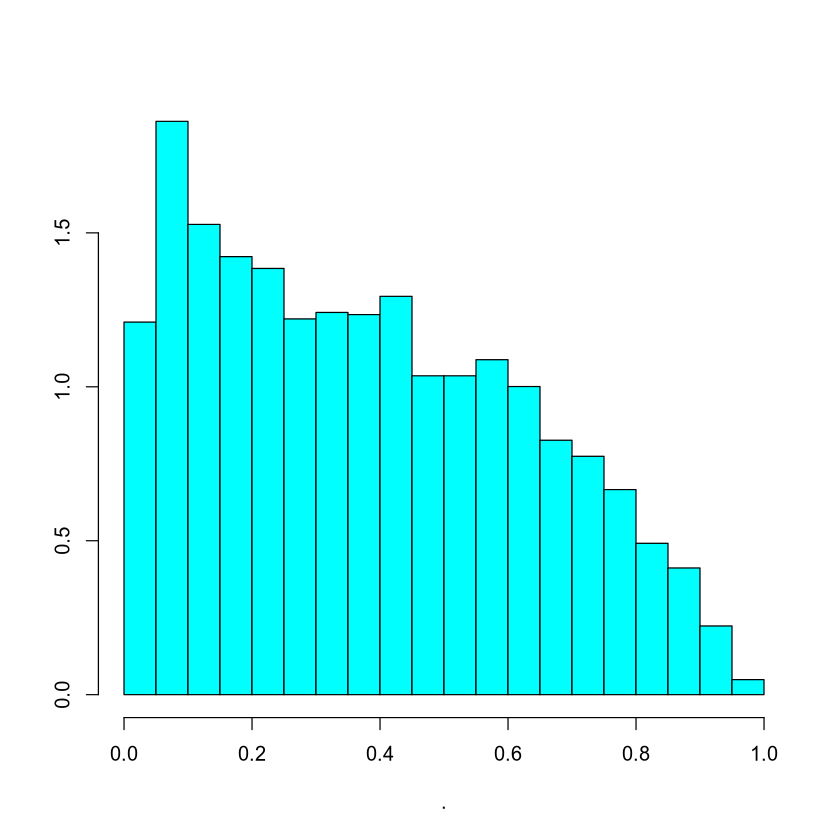

In [17]:
## PS (predicted probability of treatment)

predict(psModel, type = "response")
rhc$ps <- predict(psModel, type = "response")

rhc <- rhc %>%
  mutate(ps = predict(psModel, type = "response"))

rhc <- rhc %>%
  dplyr::select(ps, everything())

rhc$ps %>%
  MASS::truehist()


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = swang1_b ~ ps, data = rhc)

Data: ps in 3551 controls (swang1_b 0) < 2184 cases (swang1_b 1).
Area under the curve: 0.7982

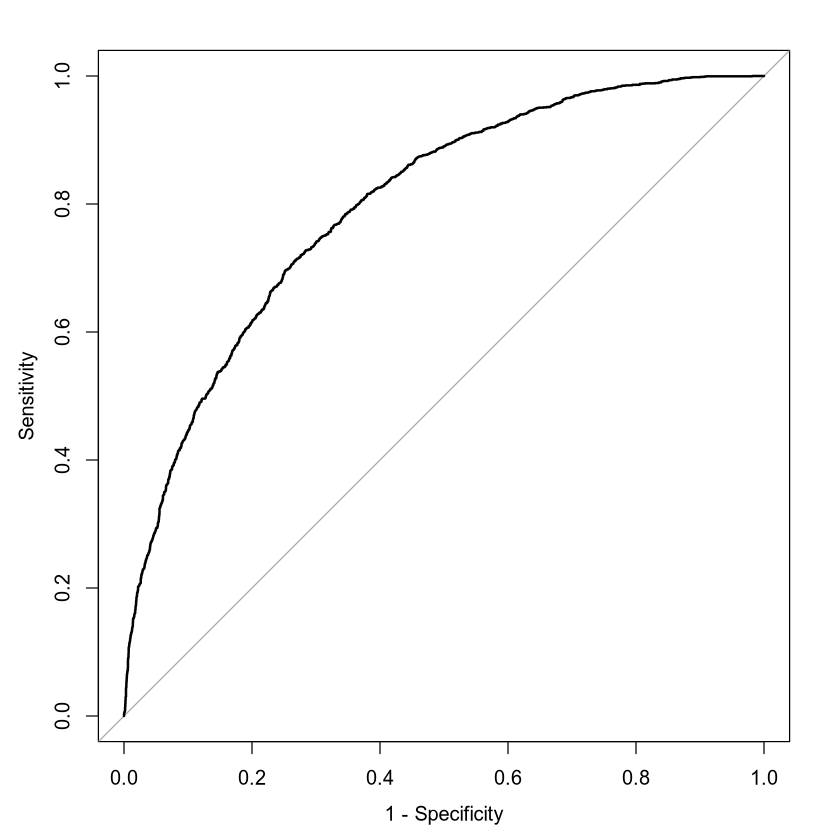

In [18]:



## PS model diagnostic by ROC
rocPsModel <- roc(swang1_b ~ ps, data = rhc)
rocPsModel
plot(rocPsModel, legacy.axes = TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


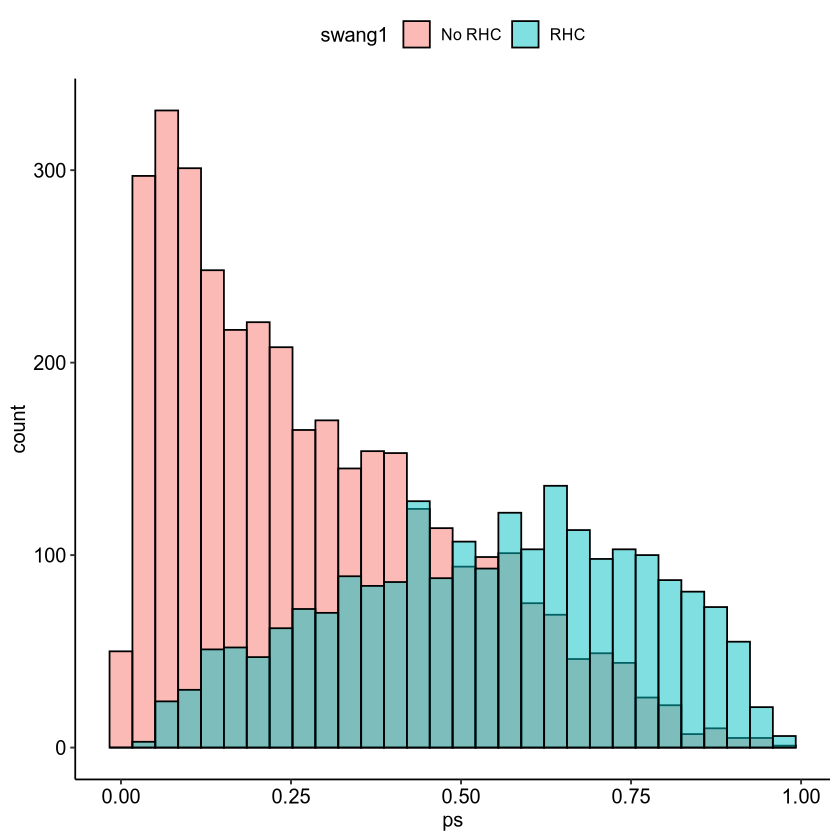

In [19]:
p_logiti <- ggplot()+theme_pubr()+
  geom_histogram(data = rhc,
                 aes(x=ps, fill = swang1), position = "identity", color="black", alpha = 0.5)
p_logiti


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


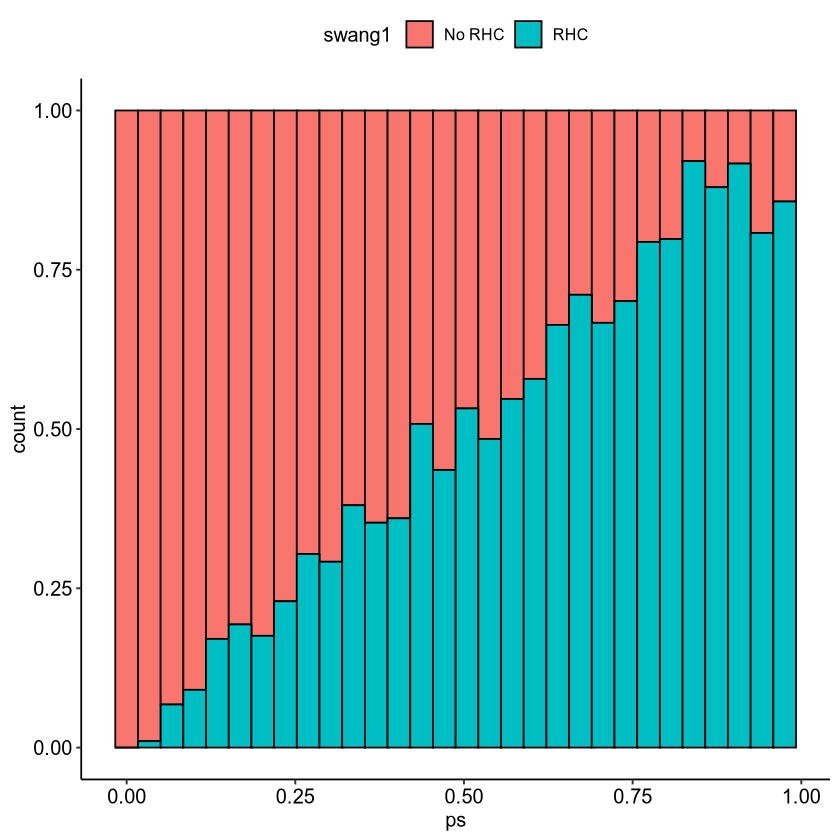

In [20]:
# p_logit

p_logitr <-ggplot()+theme_pubr()+
  geom_histogram(data = rhc,
                 aes(x=ps, fill = swang1), position = "fill", color="black")
# rhc$ps

p_logitr


PS-adjusted logistic regression (linear PS)

In [21]:
glmPsAdjLinear <- glm(formula = death_b ~ swang1_b + ps,
                      family  = binomial(link = "logit"),
                      data    = rhc)
glmPsAdjLinear %>%
  summary()

GetConfInt(glmPsAdjLinear)


Call:
glm(formula = death_b ~ swang1_b + ps, family = binomial(link = "logit"), 
    data = rhc)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.57029    0.05085  11.215  < 2e-16 ***
swang1_b     0.26041    0.06661   3.909 9.26e-05 ***
ps          -0.13885    0.13034  -1.065    0.287    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7433.3  on 5734  degrees of freedom
Residual deviance: 7416.8  on 5732  degrees of freedom
AIC: 7422.8

Number of Fisher Scoring iterations: 4


OR        lower     upper    z value   Pr(>|z|)    
(Intercept) 1.7687753 1.6014212 1.954699 11.215456 3.424160e-29
swang1_b    1.2974637 1.1389187 1.478805  3.909309 9.256052e-05
ps          0.8703581 0.6741931 1.123846 -1.065302 2.867393e-01

In [22]:
glmPsAdjQuad <- glm(formula = death_b ~ swang1 + ps + I(ps^2),
                    family  = binomial(link = "logit"),
                    data    = rhc)
glmPsAdjQuad %>%
  summary()
GetConfInt(glmPsAdjQuad)


Call:
glm(formula = death_b ~ swang1 + ps + I(ps^2), family = binomial(link = "logit"), 
    data = rhc)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.55272    0.07494   7.375 1.64e-13 ***
swang1RHC    0.26056    0.06665   3.909 9.25e-05 ***
ps          -0.01140    0.42057  -0.027    0.978    
I(ps^2)     -0.15076    0.47296  -0.319    0.750    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7433.3  on 5734  degrees of freedom
Residual deviance: 7416.7  on 5731  degrees of freedom
AIC: 7424.7

Number of Fisher Scoring iterations: 4


OR        lower     upper    z value     Pr(>|z|)    
(Intercept) 1.7379806 1.5013928 2.014190  7.37541490 1.638340e-13
swang1RHC   1.2976587 1.1390133 1.479141  3.90943336 9.251287e-05
ps          0.9886674 0.4328829 2.251437 -0.02709942 9.783804e-01
I(ps^2)     0.8600507 0.3411104 2.178886 -0.31876603 7.499039e-01

中身を見たい人向け。  
鬱陶しいのでコメントアウト

In [23]:
# rhc$swang1 == "RHC"
# rhc$ps
# rhc$ps / (1 - rhc$ps)
# log(rhc$ps / (1 - rhc$ps))


https://cran.r-project.org/web/packages/Matching/index.html

In [24]:
set.seed(1234)
listMatch <- Match(Tr = (rhc$swang1 == "RHC"),      # Need to be in 0,1
                       X        = log(rhc$ps / (1 - rhc$ps)), # logit of PS,i.e., log(PS/(1-PS)) as matching variable
                       M        = 1,                          # 1:1 match
                       caliper  = 0.2,                          # caliper = x * SD(each matching variable)
                       replace  = FALSE,
                       ties     = TRUE,
                       version  = "fast")


症例選択

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


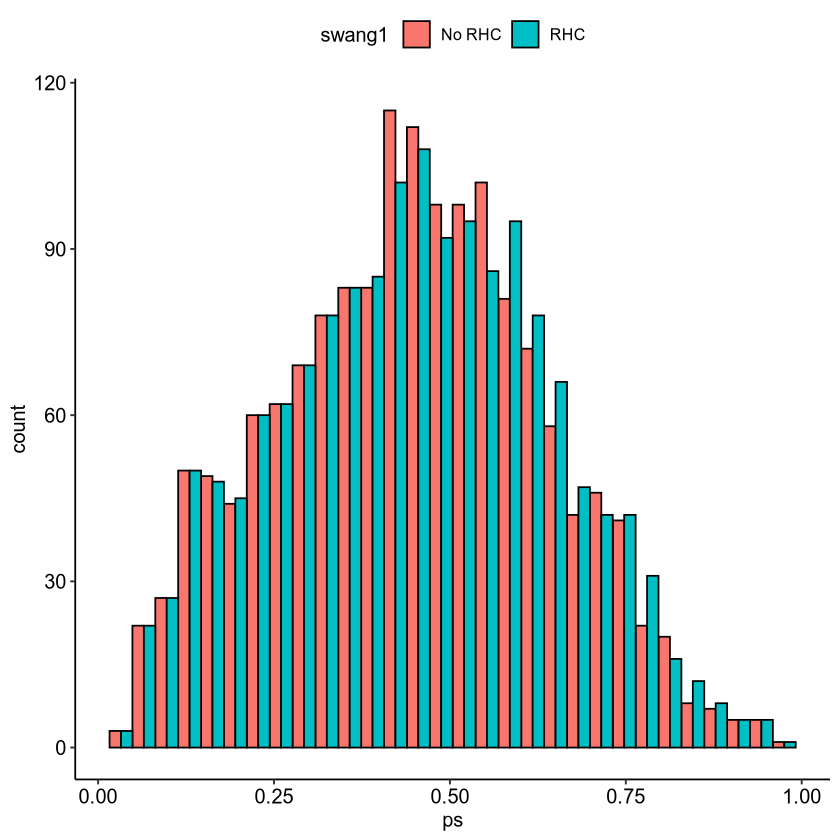

In [25]:
psMatchData <- rhc[unlist(listMatch[c("index.treated","index.control")]), ]


p_ps <- ggplot()+theme_pubr()+
  geom_histogram(data= psMatchData,
                 aes(x=ps, fill = swang1),color = "black",
                 position = "dodge")
p_ps

logistic reg in selected pts

In [26]:

glmMatched <- glm(formula = death_b ~ swang1_b,
                      family  = binomial(link = "logit"),
                      data    = psMatchData)
glmMatched %>%
  summary()
GetConfInt(glmMatched)


Call:
glm(formula = death_b ~ swang1_b, family = binomial(link = "logit"), 
    data = psMatchData)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.51117    0.05225   9.783  < 2e-16 ***
swang1_b     0.29953    0.07572   3.956 7.63e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4013.2  on 3125  degrees of freedom
Residual deviance: 3997.5  on 3124  degrees of freedom
AIC: 4001.5

Number of Fisher Scoring iterations: 4


OR       lower    upper    z value  Pr(>|z|)    
(Intercept) 1.667235 1.505574 1.847873 9.783163 1.329878e-22
swang1_b    1.349228 1.163327 1.565397 3.955885 7.625190e-05

https://yukiyanai.github.io/jp/classes/econometrics2/contents/R/matching.html

In [27]:
require(MatchIt)

set.seed(12345)

m_mn <- matchit(swang1_b ~ age + sex + race + edu + income + ninsclas + cat1 + das2d3pc + dnr1 + ca + surv2md1 + aps1 + scoma1 + wtkilo1 + temp1 + meanbp1 + resp1 + hrt1 + pafi1 + paco21 + ph1 + wblc1 + hema1 + sod1 + pot1 + crea1 + bili1 + alb1 + resp + card + neuro + gastr + renal + meta + hema + seps + trauma + ortho + cardiohx + chfhx + dementhx + psychhx + chrpulhx + renalhx + liverhx + gibledhx + malighx + immunhx + transhx + amihx, 
                   data = rhc, method = "nearest", distance = "glm")
summary(m_mn)


Call:
matchit(formula = swang1_b ~ age + sex + race + edu + income + 
    ninsclas + cat1 + das2d3pc + dnr1 + ca + surv2md1 + aps1 + 
    scoma1 + wtkilo1 + temp1 + meanbp1 + resp1 + hrt1 + pafi1 + 
    paco21 + ph1 + wblc1 + hema1 + sod1 + pot1 + crea1 + bili1 + 
    alb1 + resp + card + neuro + gastr + renal + meta + hema + 
    seps + trauma + ortho + cardiohx + chfhx + dementhx + psychhx + 
    chrpulhx + renalhx + liverhx + gibledhx + malighx + immunhx + 
    transhx + amihx, data = rhc, method = "nearest", distance = "glm")

Summary of Balance for All Data:
                            Means Treated Means Control Std. Mean Diff.
distance                           0.5395        0.2833          1.1577
age                               60.7498       61.7609         -0.0647
sexFemale                          0.4148        0.4610         -0.0937
sexMale                            0.5852        0.5390          0.0937
raceblack                          0.1534        0.1647         -0.03

プロットあれこれ

In [28]:
# plot(m_mn, interactive = FALSE)
# plot(m_mn, type = "QQ", interactive = FALSE)

In [29]:
data_m <- match.data(m_mn)


glmMatchedIt <- glm(formula = death_b ~ swang1_b,
                family  = binomial(link = "logit"),
                data    = data_m)

glmMatchedIt %>%
  summary()


data_m %>%
  group_by(death, swang1) %>%
  summarise(n=n()) %>%
  tidyr::spread(key=death, value=n) %>%
  mutate(death_rate = Yes /(Yes + No)) %>%
  DT::datatable()


Call:
glm(formula = death_b ~ swang1_b, family = binomial(link = "logit"), 
    data = data_m)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.52845    0.04430  11.929  < 2e-16 ***
swang1_b     0.22718    0.06378   3.562 0.000368 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5629.9  on 4367  degrees of freedom
Residual deviance: 5617.2  on 4366  degrees of freedom
AIC: 5621.2

Number of Fisher Scoring iterations: 4


`summarise()` has grouped output by 'death'. You can override using the `.groups` argument.


HTML widgets cannot be represented in plain text (need html)

In [30]:
glmFullMatchedIt <- glm(formula =  death_b ~ swang1_b + age + sex + race + edu + income + ninsclas + cat1 + das2d3pc + dnr1 + ca + surv2md1 + aps1 + scoma1 + wtkilo1 + temp1 + meanbp1 + resp1 + hrt1 + pafi1 + paco21 + ph1 + wblc1 + hema1 + sod1 + pot1 + crea1 + bili1 + alb1 + resp + card + neuro + gastr + renal + meta + hema + seps + trauma + ortho + cardiohx + chfhx + dementhx + psychhx + chrpulhx + renalhx + liverhx + gibledhx + malighx + immunhx + transhx + amihx,
               family  = binomial(link = "logit"),
               data    = data_m)

glmFullMatchedIt %>%
  summary()


Call:
glm(formula = death_b ~ swang1_b + age + sex + race + edu + income + 
    ninsclas + cat1 + das2d3pc + dnr1 + ca + surv2md1 + aps1 + 
    scoma1 + wtkilo1 + temp1 + meanbp1 + resp1 + hrt1 + pafi1 + 
    paco21 + ph1 + wblc1 + hema1 + sod1 + pot1 + crea1 + bili1 + 
    alb1 + resp + card + neuro + gastr + renal + meta + hema + 
    seps + trauma + ortho + cardiohx + chfhx + dementhx + psychhx + 
    chrpulhx + renalhx + liverhx + gibledhx + malighx + immunhx + 
    transhx + amihx, family = binomial(link = "logit"), data = data_m)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  1.914e+01  2.377e+02   0.081 0.935839    
swang1_b                     3.256e-01  7.711e-02   4.222 2.42e-05 ***
age                          1.223e-02  3.350e-03   3.649 0.000263 ***
sexMale                      2.795e-01  7.884e-02   3.546 0.000392 ***
raceother                    2.006e-01  1.782e-01   1.125 0.260400    
racewhite       

In [31]:
sessionInfo()


R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/dryad/miniforge3/envs/rn/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Asia/Tokyo
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] MatchIt_4.5.5     Matching_4.10-15  MASS_7.3-60       ggpubr_0.6.0     
 [5] openxlsx_4.2.7.1  tableone_0.13.2   data.table_1.16.2 pROC_1.18.5      
 [9] DT_0.33           lubridate_1.9.3   forcats_1.0.0     stringr_1.5.0    
[13] dplyr_1.1.3       purrr_1.0.2       readr_2.1.4       